In [1]:
class SystemSample:
    def __init__(self, capacity, sampleSize):
        """
        :capacity: the aggregate number of data
        :sample : sample we get from the data
        """
        self.capacity = capacity
        self.sampleSize = sampleSize
        self._count = 0        # used to iterator index of the sample 
        self.sample = []       # store the sample
        self.elementInGroup = int(capacity / sampleSize)
    
    def __iter__(self):
        return self
    
    def __next__(self):
        self._count += 1
        return self.sample[self._count - 1]
        
    # get the first element if item in sample
    def getFirst(self, item): 
        if item >= 1 and item <= self.elementInGroup:
            return item
        return self.getFirst(item - self.elementInGroup)
    
    # have known the first element
    # return the whole sample
    def getSampleByFirst(self, first):
        count = 0
        while count < self.sampleSize:
            self.sample.append(first + count * self.elementInGroup)
            count += 1
        return self.sample
            

In [2]:
class StepSample:
    def __init__(self, sampleSize, *args):
        """
        :sampleSize :the size of sample
        :groups :the previous group number
        :sample :the sample related to group
        """
        self.sampleSize = sampleSize
        self.groups = args
        self.sample = []
        self._count = 0 # used to iterator
        
    def __iter__(self):
        return self
    
    def __next__(self):
        self._count += 1
        return self.sample[self._count - 1]
    
    # get sample 
    # return sample
    def getSample(self):
        for item in self.groups:
            self.sample.append(self.sampleSize * item / sum(self.groups))
        return self.sample

1. 用系统抽样法从160个灯泡抽取一个容量为20的样本。将这160个灯泡编号为1~160，若第16个被抽中的样本编号为126，起始抽取编号为多少？

In [3]:
ss = SystemSample(160, 20)
print(f"the first element is {ss.getFirst(126)}")

the first element is 6


4. 设总体有14个个体，按照1~14进行编号。欲以系统抽样法抽取容量为n=4的样本，且第一个抽中的样本为1，则其余3个样本编号依次为多少？

In [4]:
ss2 = SystemSample(14, 4)
print(ss2.getSampleByFirst(1))

[1, 4, 7, 10]


5. 已知A、B、C三个车间一天内生产的产品分别是280件、95件、125件，为了掌握个车间产品的质量情况，需从中抽取一个样本容量为100的样本，该如何抽取？

In [5]:
stepSample = StepSample(100, 280, 95, 125)
print(stepSample.getSample())

[56.0, 19.0, 25.0]


8. 某校抽查500名学生的血型，其中有200人为O型血、125人为A型血、125人为B型血、50人为AB型血。为了研究血型与色弱的关系，需要从中抽取一个容量为20的样本，怎样抽取样本比较合适？请写出具体抽样流程

In [6]:
stepSample8 = StepSample(20, 200, 125, 125, 50)
print(f"用分层抽样较为合适， 其中抽取O型血、A型血、B型血、AB型血的样本分别为{stepSample8.getSample()}") 

用分层抽样较为合适， 其中抽取O型血、A型血、B型血、AB型血的样本分别为[8.0, 5.0, 5.0, 2.0]


13. Google公司曾有一道非常经典的面试题：给定一个长度为N的链表，其中N很大，而且不知道N的大小。试从这N个元素中随机抽取出k个元素，要求只能遍历该链表一次，而且必须保证取出的元素恰好是k个，且它们是完全随机的（每个元素被抽中的概率相等）

采用水库抽样方法：在链表的前k个元素，首先将其放入水库（即样本）中，然后从k+1个元素开始，对于数组的第m（m>k）个元素，以$\frac{k}{m}$的概率决定是否由这条记录替换水库中的一条记录，一直遍历到结束：
相关证明如下：

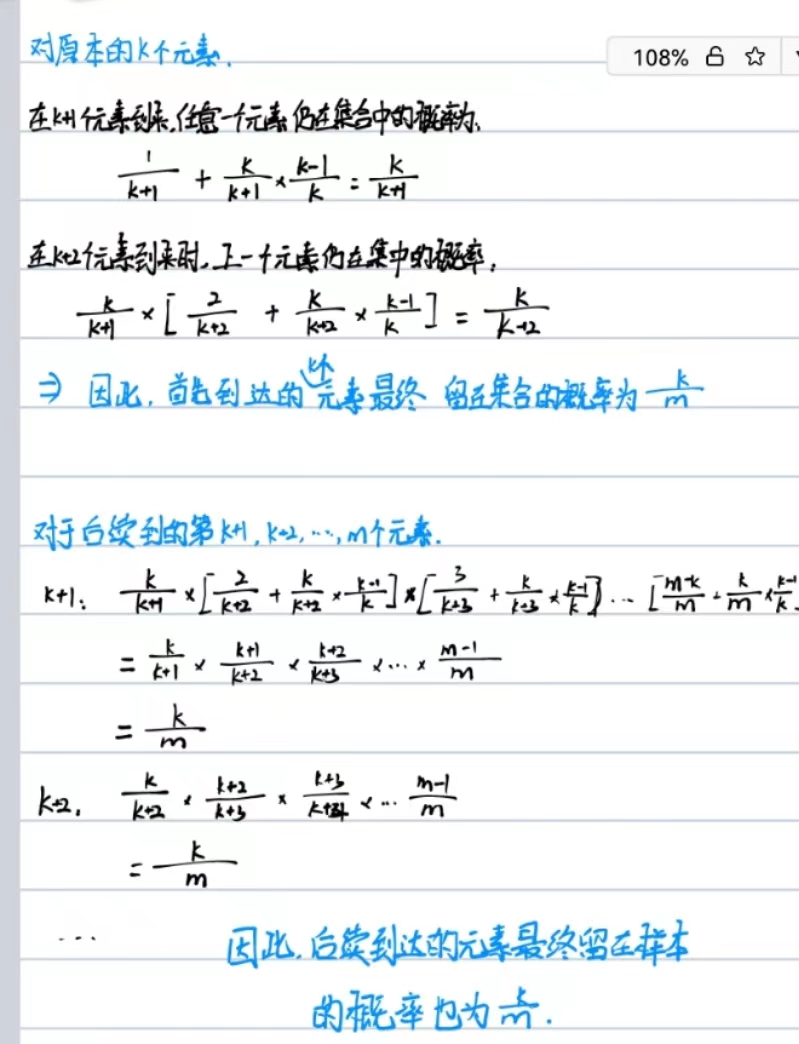

14. 假设有一个大小为N的数组，其中N的值未知，依次扫描该数组的每个元素，为每个元素赋予一个随机数，然后使用Top-K（如最大k个数）得到需要的k个元素。试回答该方法是否为一种等概率抽样方法 

是的，根据上题证明，每个元素在最后获取的k个元素中的概率是$\frac{k}{N}$, 实验证明如下：

In [1]:
import random 


class ReserviorSample:
    def __init__(self, capacity):
        self.capacity = capacity
        self.sample = []
        self._count = 0 # used to iterator
        self._counter = 1 # used to count
    
    def __iter__(self):
        return self
    
    def __next__(self):
        self._count += 1
        return self.sample[self._count - 1]
    
    def feed(self, item):
        """
        item:
        """
        if item:
            num = int(item)
#             print(num)
            if self._counter <= self.capacity:
                # the first k items
                self.sample.append(num)
                self._counter += 1
            else:
                # the items following k items
                r = random.randint(1, self._counter) # endpoint is inclusive
                if r < self.capacity:
                    self.sample[r - 1] = num
            
    # representation
    def __repr__(self):
        return str(self.sample)

In [2]:
# create the test file
def creator():
    counter = 0 
    with open('data.txt', 'a') as file:
        while True:
            counter += 1
            if counter == 1000000:
                break
            else:
                file.write(str(random.randint(1,3)))

if __name__ == '__main__':
    creator()

In [8]:
def test():
    p = ReserviorSample(10000)
    with open('data.txt', 'r', encoding='utf-8') as file:
        flag = True
        while flag:
            num = file.read(1)
            if not num:
                flag = False
            else:
                p.feed(num)
    count_1 = 0
    count_2 = 0
    count_3 = 0
        
    for i in p.sample:
        if i == 1:
            count_1 += 1
        elif i == 2:
            count_2 += 1
        else:
            count_3 += 1
    
    print(f"{count_1/10000:.2%}")
    print(f"{count_2/10000:.2%}")    
    print(f"{count_3/10000:.2%}")    

test()

33.79%
33.63%
32.58%


结论： 最终每个元素被获取的概率都是相等的